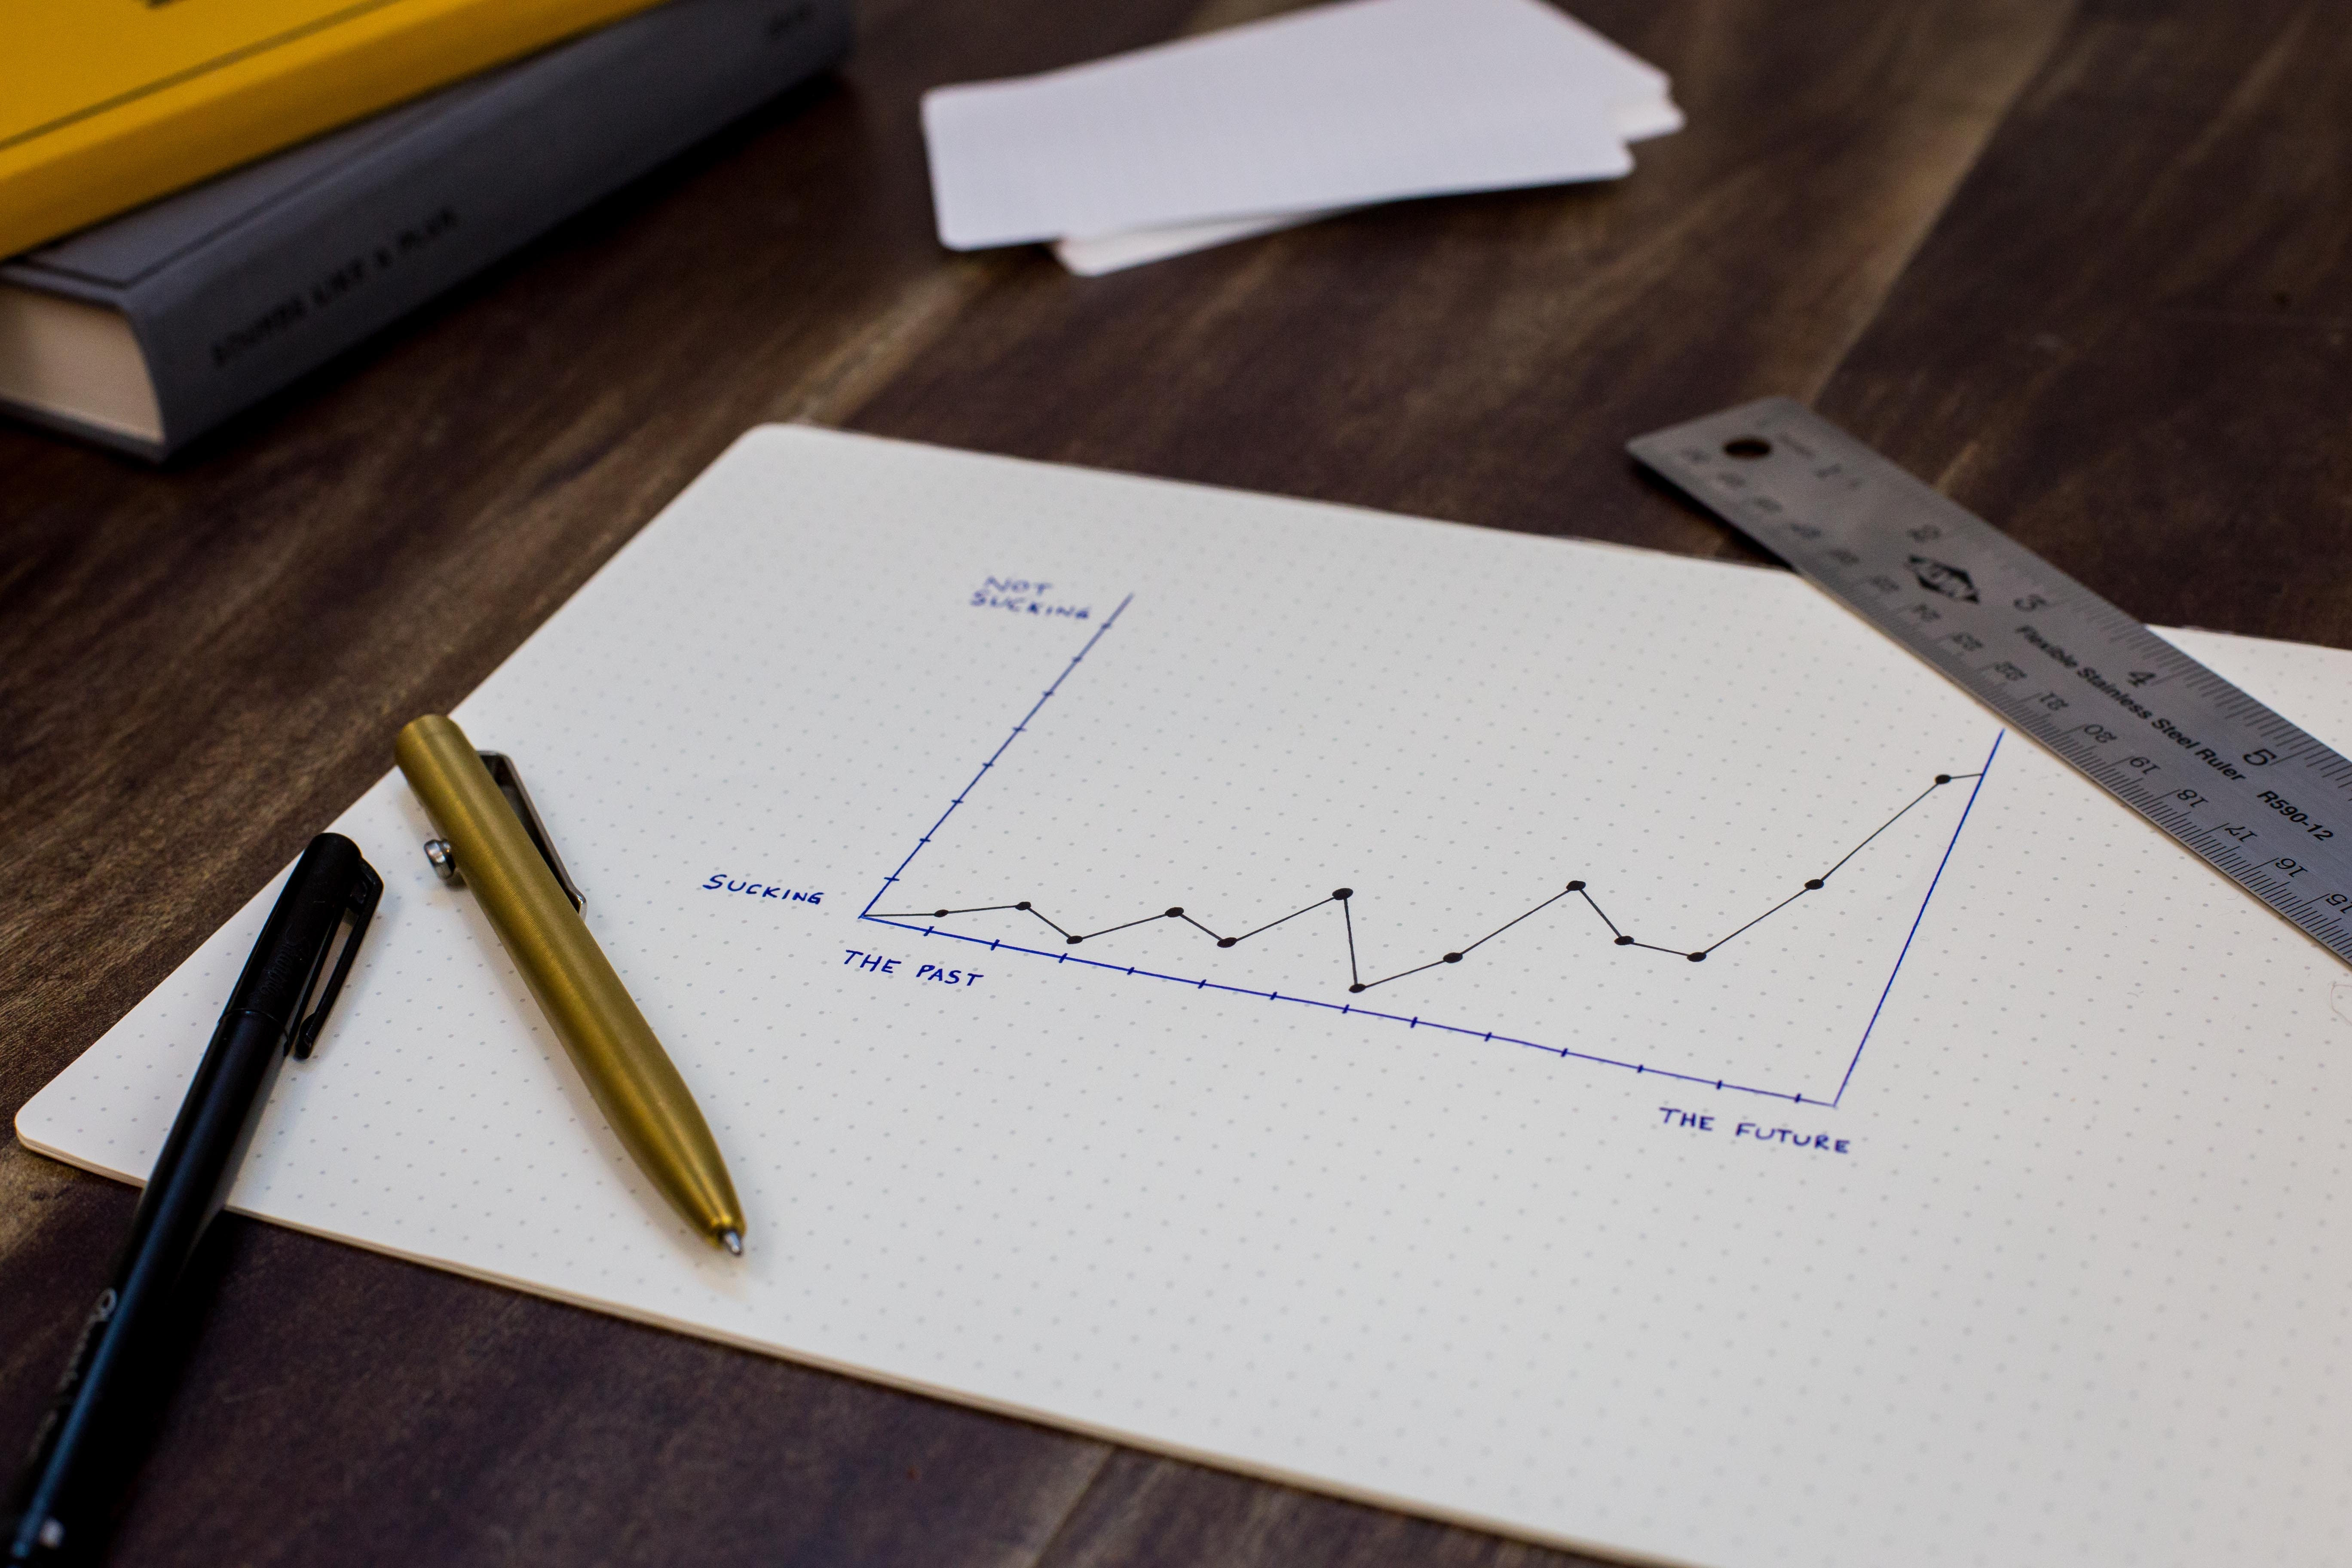

In [1]:
from IPython.display import Image
Image('files/chart.jpg', width = 790)

# Visualização de Dados usando Python e Seaborn

### E aeee galera tudo bem?! Pronto pra mais um aprendizado?
### Nessa análise estarei explicando melhor pra vocês os tipos de gráficos: LMPlot e RegPlot
##### * Como eles funcionam?
##### * Qual cenário ideal para ser usado?

In [2]:
# Importando as biliotecas que iremos usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### A biblioteca Seaborn já vem com alguns datasets de exemplos que estão disponíveis para usarmos para testes como análise exploratória, machine learning etc..
#### Por esse e outros motivos estarei usando um de seus datasets mais famosos que é o 'TIPS'.
#### Justamente porque os dados deles já estão bem tratados e como o foco da dica de hoje é para entender como esses dois gráficos do Seaborn funcionam por isso resolvi carregar esse dataset
#### Se você quiser saber e aprender um pouco mais com a parte de análise exploratória e como contruir gráficos mais profissionais, tem esse link: https://www.kaggle.com/adilsonanselmo/all-space-missions-analysis
#### Onde eu foco mais na análise exploratória dos dados e customização de gráficos mais profissionais e apresentáveis.

In [3]:
# Carregando a partir da biblioteca seaborn o dataset 'tips'
tips = sns.load_dataset('tips')

#### Esse é um dataset de um restarante onde foi filtrado algumas variáveis (colunas) que são importantes para coletar alguns insights

In [4]:
# Verficando o formato do dataset
tips.shape

(244, 7)

In [5]:
# Imprimindo as 5 primeiras linhas do dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Descrição do dataset
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# Imprimindo todas as informações do dataset
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [8]:
# Verificando os tipos de variáveis que temos no nosso dataset
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

#### Como falei anteriormente, esse dataset já foi tratado para ser usado nas nossas análises. 
#### A linha de código acima mostra que todas as variáveis já estão no formato que deveriam estar e estão prontas para executarmos nossas análises

In [9]:
# Visualizando os dados nulos no dataset
tips.apply(lambda x: sum(x.isnull()), axis = 0)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Boa! Pudemos confirmar que está tudo certo com os nossos dados e estamos liberados para usar os dados para análises. Então mbora lá...


# Vamos começar olhando como estão estão distribuidos os nossos dados
#### E já vamos usar o tipo de gráfico 'lmplot' começando por entender a relação entre a 'tip' que é a gorjeta dada pelos clientes e o 'total_bill' que é o preço total
#### A ideia aqui é entender o seguinte: quanto maior for a conta do cliente, será que nossos clientes são mais generoso em dar gorjeta?
#### Para isso temos o nosso querido gráfico lmplot que irá nos ajudar com isso de forma visual sem precisarmos de muito esforço para entender.
#### Eu vou executar primeiro o gráfico e na sequência explico os detalhes

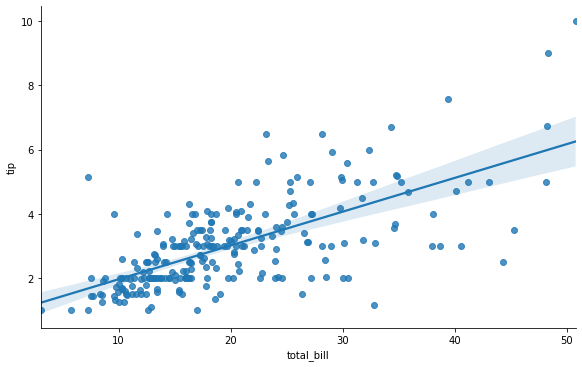

In [10]:
# Criando o gráfico o mais básico possível
sns.lmplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    aspect = 1.6
);

### Vamos a explicação:
#### O que temos aqui é o segunte: Mas antes vamos a um detalhe importante, por padrão os gráficos da biblioteca seaborn possuem três conjutos de parâmetros fixo e que são obrigatórios, todos os outros são opcionais.
#### Os três parâmetros são: valores para os eixos x & y e a refência ao conjunto de dados no nosso caso é 'tips'. Em quase todos os gráficos do seaborn você vai ter esse padrão.
#### Agora mbora entender o nosso gráfico: De cara você já se depara com essa linha na diagonal e você pensa o que signfica né... Essa linha representa o melhor ajuste possível da tendência para gorjeta que os clientes desse restaurante têm dado que por sinal temos um bom resultado, porque a linha vai crescendo, isso é: quanto maior for a conta total maior será a gorjeta.
#### Também podemos ver alguns pontos que ficam mais distantes da linha, no canto superiror direito conseguimos ver alguns pontos e em alguns outros pontos do gráficos, chamamos isso de outliers.
#### Outliers são anamolias ou exceções. O que quer dizer que temos alguns clientes que acabam gastando e/ou dando uma gorjeta que vai muito fora do que a maioria faz. Só esse gráfico em si tem muitos detalhes que irão ajudar muito os tomadores de decisão é só você enxegar o pontencial dele...

#### Por isso eu adoro a ciência de dados, quando você souber fazer o match entre hard skill e soft skills (conhecimento técnio e de negócio) ela nos ajuda a prever o melhor ajuste possível para entender a tendência do comportamento dos nossos clientes esse deve ser o foco de um Cientista de Dados.
#### Nesse gráfico conseguimos ver que existe uma sombra convergindo o centro e dentro dele há alguns pedaços dos nossos dados. Esse ponto convergente é a média estatística, por baixo dos panos o nosso algorítimo fez uma previsão generalizada do valor 'tip' do nosso dataset em uma base diária do restaurante.

#### Agora vamos adicionar mais informações ao nosso gráfico e dessa vez vamos procurar entender quem dá mais gorjeta os fumantes ou não fumantes?

#### Para isso iremos copiar o mesmo script acima e só iremos invocar o parâmetro 'hue' recebendo a variável 'smoker'

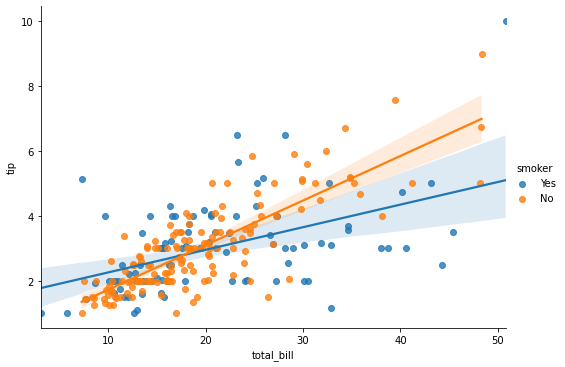

In [11]:
# Quem dá mais gorjeta, os fumantes ou não fumantes?
sns.lmplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    hue = 'smoker',
    aspect = 1.4
);

#### Vamos à explicação: Já dá pra entender o poder que temos em mãos não é mesmo?!
#### Fica claro aqui que os clientes fumantes (representados na cor azul) são mais generosos quando se trata de dar gorjetas, lembra da sombra na cor azul convergindo o centro com a linha a azul na diagonal? Eu expliquei no início que esse ponto convergente é a média estatística, por baixo dos panos o nosso algorítimo fez uma previsão generalizada, conseguimos perceber que ela é maior em relação a sombra na cor laranja (que representa os não fumantes).

#### Porém a linha azul nos mostra que os fumantes não são tão concistentes com o hábito de dar gorjetas. Porque se você perceber os dados na sombra azul eles são um pouco mais espalhados em relação a linha e a sombra na cor laranja. Muito bom não é mesmo?!

#### O foco aqui é explicar como funciona os gráficos, mas vou dar mais algumas dicas de como deixar o nosso gráfico um pouco mais personalizado

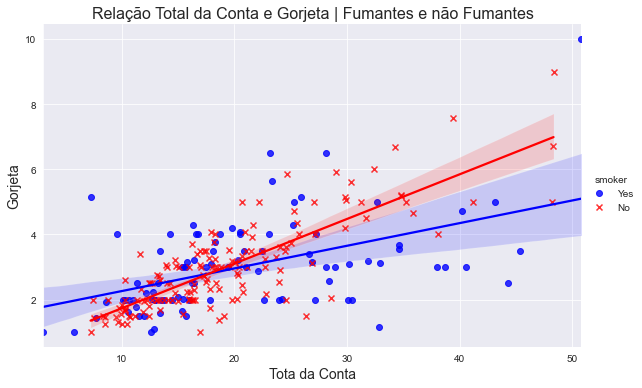

In [12]:
# Quem dá mais gorjeta, os fumantes ou não fumantes?
# Agora vamos customizar um pouco mais ele...

g = sns.set_style('darkgrid')
g = sns.lmplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    hue = 'smoker',
    aspect = 1.6,
    markers = ['o', 'x'],
    palette = dict(Yes = 'b', No = 'r')
)

g.ax.set_title('Relação Total da Conta e Gorjeta | Fumantes e não Fumantes', fontdict = {'size': 16})
g.ax.set_xlabel('Tota da Conta', fontdict = {'size': 14})
g.ax.set_ylabel('Gorjeta', fontdict = {'size': 14})

plt.show()

#### O que fizemos foi: definimos o marcador de pontos de dados, coloquei como não fumantes a letra 'x' (representando não). Detalhe importante: Construir gráficos é quase uma arte, e não é assim tão trivial quanto muita gente pensa, o seu trabalho como Analista ou Cientista é deixar tudo mastigado para os tomadores de decisão, lembra sempre: você não constroi o gráfico pra você e sim para outras pessoas e aqui você precisa saber contar uma história, levando a mente da pessoa a entender o que o gráfico quer passar.

#### Fora o título do gráfico e o título dos rótulos que precisam estar bem claro e objetivo. Ahhh e você viu também as cores né, para 'não' escolhi a cor vermelha como negativo porque o cérebro humano já está acostumado e na hora de interpretar vai ser meio meio que automático, quando mais o seu gráfico levantar dúvidas para entender ele, você precisa rever os seus conceitos e estudar mais sobre a construção de gráficos. E como fumantes coloquei na cor azul de positivo ou 'sim'.

#### E se você pensa que já acabou... Não ainda tem mais outra coisa que podemos personalisar nesse gráfico.

#### Que tal separarmos o gráfico em dois? Um para fumantes e outro para não fumantes, e pra isso o nosso querido python fazer num piscar de olho. Vejamos...

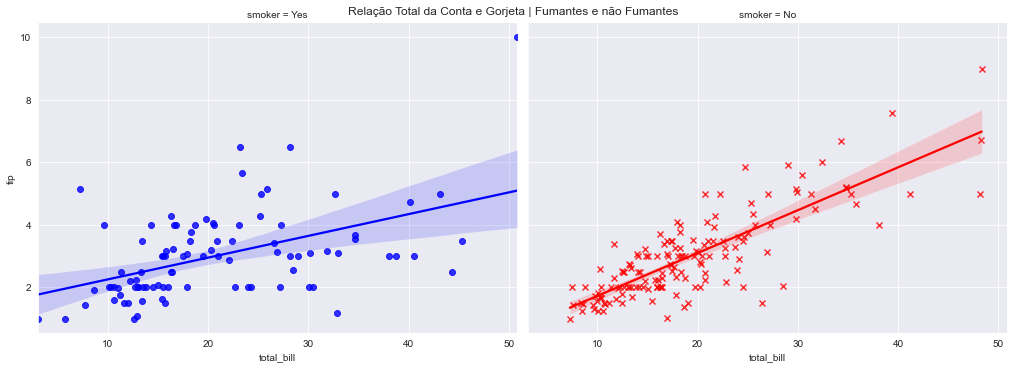

In [13]:
# Quem dá mais gorjeta, os fumantes ou não fumantes?
# Agora vamos serpar em dois gráficos, para fumantes e não fumantes

g = sns.set_style('darkgrid')
g = sns.lmplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    hue = 'smoker',
    aspect = 1.4,
    markers = ['o', 'x'],
    palette = dict(Yes = 'b', No = 'r'),
    col = 'smoker'
)

plt.suptitle('Relação Total da Conta e Gorjeta | Fumantes e não Fumantes')
plt.show()

#### Olha só como ficou bem mais fácil de entender não é mesmo? A essa altura espero que você já conseguiu entender o mundo de possibilidades que temos à disposição... Sabendo as perguntas que queremos respostas, conseguimos insights muito valiosos, e dar um UP no seu negócio ou no da sua empresa.

#### O que eu fiz no script acima foi: Adicionei um novo parâmetro opcional o 'col' ela cria um gráfico para cada tipo de categoria que vamos ter em uma variável, no nosso caso como a nossa variável 'smoker' só tem dois tipos de dados categoricos o (Yes e o No) o algorítimo gerou pra nós dois tipos de dados correspondentes.

#### E o mundo de possibilidades não para por aí, podemos ainda usar o parâmetro 'hue' dessa vez para exibir a relação do 'total_bill' com o 'day' veja como fica.

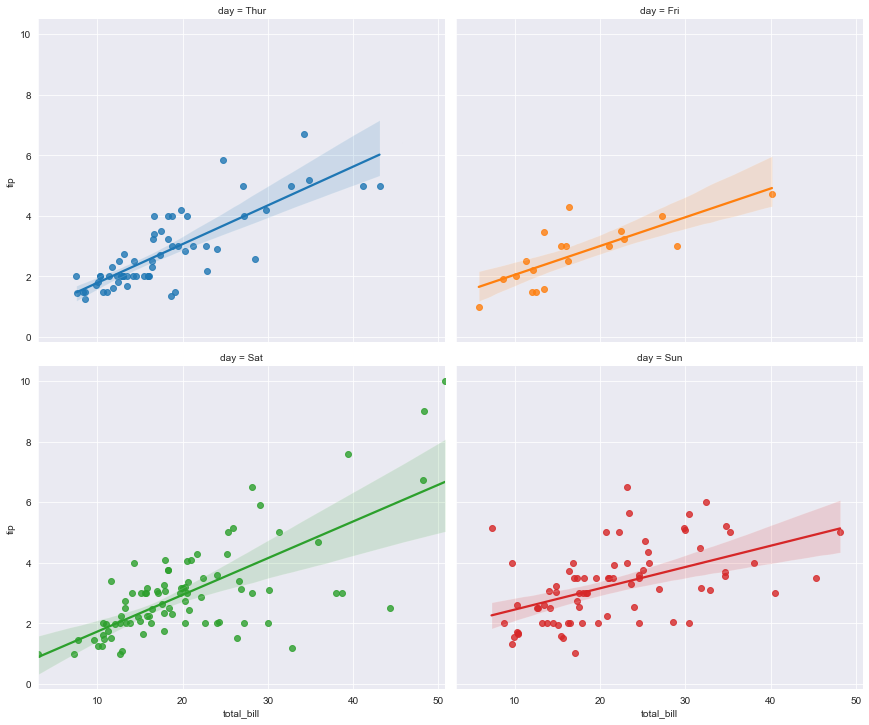

In [14]:
# Qual é a relação entre o custo total com a quantidade da gorjeta por dias de atendimento no restaurante?

sns.lmplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    col = 'day',
    hue = 'day',
    aspect = 1.2,
    col_wrap = 2
);

#### Toppp! Aqui nós vemos que o dia de sábado (sat) é o dia que mais temos gorjetas. E como você já percebeu também no dia de domingo (sun) temos mais concistência no recebimento de gorjetas.
#### Recomendo que você pratique e inclua outros parâmentros, no parâmetro 'col' você colocar por sexo (sex), 'time'. E você terá outros insights preciosos do dataset.

#### Vamos agora dar uma olhada no tipo de gráfico Regplot:
#### O tipo de gráfico Regplot() não vai fugir muito do gráfico Lmplot() quando falamos das funcionalidades principais. O foco nos dois gráficos é de conseguirmos ter uma visualização de um relacionamento linear, isto é: por meio da regressão.
#### Basicamente nós vamos ter um Scatterplot (O Scatterplot é um tipo de gráfico de disperção, utilizando álgebra para fazer correlação entre duas variáveis, x & y). No nosso caso do gráfico Regplot também utilizamos duas variáveis só que com um modelo de regressão x ~ y que na sequência plota uma linha de regressão com um intervalo de confiança de 95%.

#### Precisa ficar claro a diferença entre esses dois gráficos para que na hora de escolher você escolha o gráfico correto. Por isso vamos desmistificar ainda mais... Lembra que no gráfico Lmplot nós temos três parâmetros obrigatórios ('x', 'y', e 'data'). No Regplot você vai ver que os parâmetros são flexisíveis o que significa que as variáveis (x & y) não precisam necessáriamente receber dados do tipo String como entrada.

#### Que quer dizer que no tipo de gráfico Regplot os parâmetros (x & y) podem também receber dados em outros formatos como: objetos de série Pandas, matrizes NumPy simples, referências de um objeto do tipo DataFrame do Pandas.
#### Aqui vai um overview dos parâmetros do Regplot de acordo com a documentação oficial: 
#### seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None).


#### Vamos imprimir um gráfico Regplot básico, e você vai perceber que as diferenças no visual do gráfico Regplot em relação ao gráfico Lmplot são mínimas.

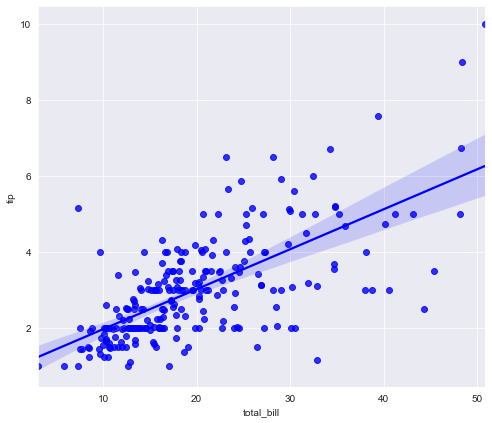

In [15]:
# Criando o gráfico o mais básico possível
f = plt.subplots(figsize = (8, 7))

sns.regplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    color = 'b'
);

#### Podemos utilizar mais recursos desse gráfico, como diferenciar as cores da linha de regressão com os dados

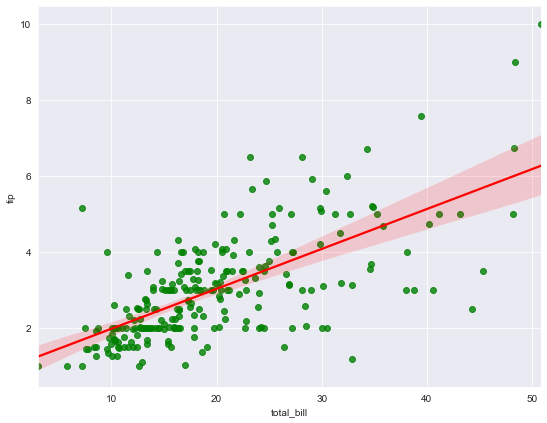

In [16]:
# Relação do custo total com a gorjeta
f = plt.subplots(figsize = (9, 7))

sns.regplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    scatter_kws = {'color': 'g'},
    line_kws = {'color': 'r'}
    
);

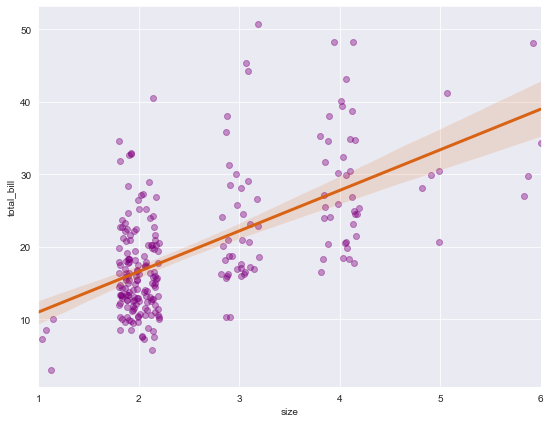

In [17]:
# Relação do custo total com o tamanho da refeição
f = plt.subplots(figsize = (9, 7))

sns.regplot(
    x = 'size',
    y = 'total_bill',
    data = tips,
    scatter_kws = {'color': 'purple', 'alpha': 0.4}, 
    line_kws = {'color': '#d95f0e', 'alpha': 10, 'lw': 3},
    x_jitter = .2
);

#### Como podemos ver, dependendo o tipo de informação que você deseja coletar a escolha do tipo de gráfico fará toda diferença. Com escolhendo um ou outro gráfico conseguimos plotar dados que podem nos dar as médias e intervalo de confiança para valores únicos, ajustar uma regressão polinomial, aumentar ou diminuir o intervalo de confiança ao invés de 95% você pode escolherno intervalo [0 - 100], basta utilizar o parâmetro 'ci' do gráfico Regplot para o intervalo que você quiser exemplo: 'ci = 55'. 


#### Lá em cima eu coloquei os parâmetros do Regplot de acordo com a documentação oficial, o seu aprendizado depende também do seu esforço. Seja curios e explore outras opções e divirta-se aprendendo. :)

### Fim...